<a href="https://colab.research.google.com/github/XIEXINHENG/log-signature-RNN-model/blob/master/SDE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install esig
!pip install fbm

     |████████████████████████████████| 11.9MB 331kB/s 


In [ ]:
import os
%tensorflow_version 1.x
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import ParameterGrid
from sklearn import preprocessing
import random
import numpy as np
from numpy import genfromtxt, array
from math import pow 
import os
import math
## sigtools has a subpackage sigtools.tosig that analyses time series data
import esig
import esig.tosig as ts
## fractional brownian motion package
from fbm import FBM,fbm
import matplotlib.pyplot as plt
stream2logsig = ts.stream2logsig
stream2sig = ts.stream2sig
logsigdim = ts.logsigdim
sigdim = ts.sigdim

from numpy.random import standard_normal
from numpy import array, zeros, sqrt, shape, convolve

from google.colab import drive ##
drive.mount('/content/drive') ##
os.chdir('/content/drive/My Drive/RNNfinal2') ##
%cd "/content/drive/My Drive/RNNfinal2"
from PPP import Model
from FeatureSetCalculation_Lib import ComputeMultiLevelLogsig1dBM

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content



Using TensorFlow backend.


In [ ]:
from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))
    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    
    np.cumsum(r, axis=-1, out=out)
    
    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

In [ ]:
#dX_t=a(X_t)dt+b(X_t)dW_t,
#dX_t = (1-X_t)dt + dW_t,
for i in range(5,11):
  start = time.time()
  # The Wiener process parameter.
  delta = 1
  # Total time.
  T = 1
  # Number of steps.
  N = 2**i
  # Time step size
  dt = T/N
  print(N)
  # Number of realizations to generate.
  m = 2200
  # Create an empty array to store the realizations.
  b = np.empty((m,N+1))
  b[:, 0] = 0
  brownian(b[:,0], N, dt, delta, out=b[:,1:])
  print(b)
  X = np.empty((m,N+1))
  X[:, 0] = 0
  for j in range(0,m):
    for step in range(1,N+1):
      X[j,step] = X[j,step-1] + (1-X[j,step-1]) * dt + (b[j,step]-b[j,step-1])
  X_t = X[:,-1]
  np.save('output_{}_{}'.format('2_power',str(i)), X_t)
  np.save('BM_paths_{}_{}'.format('2_power',str(i)), b)
  print ("Time = " + str(time.time()-start))




32
[[ 0.         -0.27961858 -0.20367788 ...  1.2249555   0.98379678
   1.08272331]
 [ 0.         -0.10508798 -0.17665801 ... -0.33398268 -0.36723392
  -0.20354888]
 [ 0.         -0.04360962 -0.01430525 ...  1.16557135  0.88111182
   0.78188885]
 ...
 [ 0.         -0.01071589 -0.04051079 ... -1.37223051 -1.31064729
  -1.28030889]
 [ 0.          0.14103191  0.28673751 ...  0.36757646  0.34192275
   0.46111468]
 [ 0.         -0.15044254 -0.54257993 ... -1.35226932 -1.25331964
  -1.36823809]]
Time = 0.19666600227355957
64
[[ 0.         -0.00293018  0.00349358 ...  0.18841255  0.09725718
   0.05996221]
 [ 0.         -0.12582293 -0.12641683 ... -0.86994216 -0.80040232
  -0.78838416]
 [ 0.          0.11906871  0.33400813 ...  0.11721101  0.10500915
   0.1459246 ]
 ...
 [ 0.         -0.07510077 -0.36229665 ... -1.72948873 -1.8838868
  -1.98565271]
 [ 0.          0.15484196  0.07974629 ...  1.09114984  1.06235738
   0.88089143]
 [ 0.         -0.06888361 -0.07311916 ... -0.01499811 -0.01668546


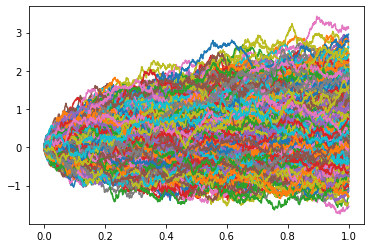

In [ ]:
t = np.linspace(0.0, 1.0, N+1)
for k in range(m):
  plt.plot(t, X[k,:])


In [ ]:
BM_paths_all = []
output_all = []
number_of_samples_all = []
for i in range(5,11):
  BM_path = np.load('BM_paths_{}_{}.npy'.format('2_power',str(i)))
  BM_paths_all.append(BM_path)
  print(BM_paths_all[i-5].shape)
  out_put = np.load('output_{}_{}.npy'.format('2_power',str(i)))
  output_all.append(out_put)
  print(output_all[i-5].shape)
  number_of_sample = BM_paths_all[i-5].shape[0]
  number_of_samples_all.append(number_of_sample) 
print (number_of_samples_all)

"""
BM1001 = np.zeros([number_of_samples, 1001])
for i in range(number_of_samples):
    for j in range(5001):
        if j%5==0:
            BM1001[i][int(j/5)] = BM_paths[i][j]
BM_paths = BM1001
"""

T=1

(2200, 33)
(2200,)
(2200, 65)
(2200,)
(2200, 129)
(2200,)
(2200, 257)
(2200,)
(2200, 513)
(2200,)
(2200, 1025)
(2200,)
[2200, 2200, 2200, 2200, 2200, 2200]


In [ ]:
# Parameters grid
#param_grid = {'deg_of_sig': [2], 'number_of_segment': [4],
param_grid = {'deg_of_sig': [5], 'number_of_segment': [4],
'learning_rate': [0.001]}
Param = list(ParameterGrid(param_grid))
"""
print(Param)
[{'deg_of_sig': 2, 'learning_rate': 0.001, 'number_of_segment': 4}, 
{'deg_of_sig': 3, 'learning_rate': 0.001, 'number_of_segment': 4}, 
{'deg_of_sig': 4, 'learning_rate': 0.001, 'number_of_segment': 4}, 
{'deg_of_sig': 5, 'learning_rate': 0.001, 'number_of_segment': 4}]
"""
# Parameters
training_iters =  10000#000
batch_size = 128
display_step = 1
# Network Parameters
n_input = 1 # 
n_hidden = 64 # hidden layer num of features
n_classes = 1 # the dim of the solution to SDE


error_tol = 0.001/512

test_len = 200 #int(np.shape(BM_paths)[0]*0.1)

In [ ]:
sig_comp_time_all = []
test_result_all = []
test_time_all = []
for b in range(0,5):
  test_result = []
  test_time = []
  sig_comp_time = []
  for a in range(0,6):
    n_steps = 2**(i+5) # timesteps
    BM_paths = BM_paths_all[a]
    output = output_all[a]
    Y = output
    number_of_samples = number_of_samples_all[a]
    for i in range(np.size(Param)):
      start = time.time()
      # Raw data feature set generator
      if Param[i]['deg_of_sig']==1:
        n_input = 1
        X_raw = BM_paths[a].reshape(-1, BM_paths.shape[1], n_input)
        print(X_raw.shape)
        model3 = Model( Param[i]['learning_rate'], training_iters, batch_size, display_step, n_input, X_raw.shape[1], n_hidden, n_classes, Param[i]['deg_of_sig'], X_raw, Y)
    # Folded raw data feature set generator
      elif Param[i]['deg_of_sig']==0:
        n_input = int(BM_paths.shape[1]/Param[i]['number_of_segment'])
        X_raw = np.zeros([BM_paths.shape[0], n_input * Param[i]['number_of_segment']])
        for j in range(BM_paths.shape[0]):
            X_raw[j] = BM_paths[j, :n_input * Param[i]['number_of_segment']]
        X_raw = X_raw.reshape(BM_paths.shape[0], Param[i]['number_of_segment'], n_input)
        elapsed = time.time()-start
        sig_comp_time.append(elapsed)
        model3 = Model( Param[i]['learning_rate'], training_iters, batch_size, display_step, n_input, Param[i]['number_of_segment'], n_hidden, n_classes, Param[i]['deg_of_sig'], X_raw, Y)
    # Logsig feature set generator
      else:
        X_logsig_start = ComputeMultiLevelLogsig1dBM(BM_paths, Param[i]['number_of_segment'], Param[i]['deg_of_sig'], T)
        n_input = np.shape(X_logsig_start)[2]
        elapsed = time.time()-start
        sig_comp_time.append(elapsed)
        model3 = Model( Param[i]['learning_rate'], training_iters, batch_size, display_step, n_input, Param[i]['number_of_segment'], n_hidden, n_classes, Param[i]['deg_of_sig'], X_logsig_start, Y)


    # build and train model
      fixed_error_result_model3 = model3.BuildModelKeras(test_len, error_tol)
    

      print("Time = " + str(time.time()-start))
      print("Testing loss = " + str(fixed_error_result_model3['Loss']))
    # model3.KerasPredict()
      test_result.append(fixed_error_result_model3 ['Loss'])
      test_time.append(fixed_error_result_model3 ['Time'])
    
    
      ##np.save('error_tol'+str(error_tol)+'deg_logsig'+str(Param[i]['deg_of_sig'])+'_test_result', test_result)
      ##np.save('error_tol'+str(error_tol)+'deg_logsig'+str(Param[i]['deg_of_sig'])+'_test_time', test_time)
      ##np.save('error_tol'+str(error_tol)+'deg_logsig'+str(Param[i]['deg_of_sig'])+'_sig_comp_time', elapsed)
      print(test_time)
      print(test_result)
      print(sig_comp_time)
  test_result_all.append(test_result)
  test_time_all.append(test_time)
  sig_comp_time_all.append(sig_comp_time)
  print(test_time_all)
  print(test_result_all)
  print(sig_comp_time_all)
test_time_all = np.array(test_time_all)
test_result_all = np.array(test_result_all)
sig_comp_time_all = np.array(sig_comp_time_all)
print (np.mean(test_time_all, axis=0))
print (np.mean(test_result_all, axis=0))
print (np.mean(sig_comp_time_all, axis=0))

Streaming output truncated to the last 5000 lines.
Iter 2096, Training Accuracy= 0.0000439
Iter 2097, Training Accuracy= 0.0000385
Iter 2098, Training Accuracy= 0.0000943
Iter 2099, Training Accuracy= 0.0000426
Iter 2100, Training Accuracy= 0.0000444
Iter 2101, Training Accuracy= 0.0000457
Iter 2102, Training Accuracy= 0.0000396
Iter 2103, Training Accuracy= 0.0001054
Iter 2104, Training Accuracy= 0.0000485
Iter 2105, Training Accuracy= 0.0000547
Iter 2106, Training Accuracy= 0.0000305
Iter 2107, Training Accuracy= 0.0001157
Iter 2108, Training Accuracy= 0.0002403
Iter 2109, Training Accuracy= 0.0000407
Iter 2110, Training Accuracy= 0.0000388
Iter 2111, Training Accuracy= 0.0000412
Iter 2112, Training Accuracy= 0.0000369
Iter 2113, Training Accuracy= 0.0000484
Iter 2114, Training Accuracy= 0.0000485
Iter 2115, Training Accuracy= 0.0000471
Iter 2116, Training Accuracy= 0.0000556
Iter 2117, Training Accuracy= 0.0000300
Iter 2118, Training Accuracy= 0.0000372
Iter 2119, Training Accuracy=

In [ ]:
      print(test_time)
      print(test_result)
      print(sig_comp_time)

[87.42159914970398]
[1.105192]
[3.0171031951904297, 4.956562519073486]
